# Project Name: Insurance Cost Prediction (PRCP-1021-InsCostPred)
## Team_ID:PTID-CDS-DEC-24-2258
## Project Type: Regression
### Contribution: Aarti Salunkhe

## Project Summary

This project involves building a predictive model to estimate the cost of insurance based on various features of the insured individual. The dataset contains 7 columns, each representing key factors that influence insurance premiums. The primary objective is to predict the insurance charges (the target variable) based on individual attributes such as age, gender, BMI, smoking status, number of dependents, and geographic location.
The goal of this project is to develop a machine learning model that can accurately predict the insurance cost for an individual based on their personal and demographic information. By analyzing the factors affecting insurance premiums, we aim to provide valuable insights that can help both insurers in pricing their policies and consumers in understanding how their attributes influence the cost of their insurance
#### Which Factors Influence the Price of Health Insurance?¶
Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

- Age: The age of the person covered by the insurance (the primary beneficiary).- 
Sex: The gender of the insurance holder (male or female)
-  BMI: The Body Mass Index, which is a measure of body fat based on weight and height. A BMI between 18.5 and 24.9 is considered healthy
-  Children: The number of children or dependents covered by the insurance
-  Smoker: Whether the person smokes or not
-  Region: The region where the person lives in the US, which could be northeast, southeast, southwest, or northwest
-  Charges: The actual medical costs billed by the health insurance (this is the target variable we want to predict)t

# Problem Statement:

 Insurance companies need to predict how much they should charge their customers for medical insurance. This charge depends on various factors such as the customer’s age, BMI, smoking habits, number of dependents, and location. Accurate predictions help the company manage costs while providing fair pricing to customers.

If the charges are set too low, the company might face losses. On the other hand, if the charges are set too high, customers might switch to competitors. Therefore, it’s important to create a model that can predict the insurance charges based on customer details.

## Objective:

The main goal of this project is to develop a machine learning model that can predict the insurance cost for a customer based on key factors such as age, BMI, smoking habits, gender, region, and the number of dependents. This model will help the insurance company:

- 1.Provide Accurate Pricing: Set fair and accurate insurance charges for customers.
- 2.Improve Business Efficiency: Reduce losses by avoiding underpriced insurance.
- 3.Enhance Customer Satisfaction: Offer competitive pricing to retain customers.
- 4.Assist in Decision-Making: Use insights from the model to better understand the factors that influence insurance costs.

By solving this problem, we aim to help the company make informed business decisions and improve its overall profitability.

#### Importing All Required Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import pickle
import math

### Loading Dataset

In [11]:
df=pd.read_csv('datasets_13720_18513_insurance(1).csv')

In [12]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


from above dataset we can see that medical billed cost is depends on age,sex,childern,smoker and region
This dataset contains 1338 data points with 6 independent features and 1 target feature (charges).



# Basic Checks

### Checking first five rows of dataset

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Checking last 5 rows of dataset

In [18]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Showing Shape and Size of Dataset

In [20]:
print(df.shape,df.size)

(1338, 7) 9366


### Checking info of dataset

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


from the above ,we can see that the dataset consists of 2 columns containing floating point
values 3 columns with categorical values and the remaining columns comprising integer values

### Checking all columns of dataset

In [25]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Checking how many nunique values in each of the column

In [27]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### Checking the data curruption

In [29]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [30]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

insight : 
- numerical columns are correctly assigned as numerical and catagorical columns are correctly assigned as object based on their data types

### Checking for duplicates

In [33]:
df.duplicated().sum()

1

In [34]:
# Display the duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631



from above, we can see that there are duplicated rows. Lets drop the duplicates.

In [36]:
# Removing Duplicate rows,keepinf the first occurance
df =df.drop_duplicates()

# Verify duplicates are removed
print(df.duplicated().sum())


0


### Checking for some Statistical info

In [38]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## Insights:
- Age : age range 18 to 64 years and most common age group around 39 years 
- BMI : BMI range 15.96 to 53.13 and average BMI: 30.66 (slightly overweight category)
- childern : children range 0 to 5 and Average Number of Children : 1.09
- Charges : this is our target variable , charges Range: $1,121.87 to $63,770.43 
- Average Charges: $13,270
- 25% of customers: Pay less than $4,740.
- 50% of customers (Median): Pay around $9,382.
- 75% of customers: Pay less than $16,640.
- Most customers are around 39 years old.BMI indicating slightly overweight, most of childrens have 0-2 and some Some customers pay very high charges


### Statistical Info for Object Columns

In [41]:
df.describe(include='O')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


## Insights : 
- sex = 2 unique catagories (male,female) and most costomers are male.
- smoker = 2 unique catagories (yes , no ) ,the majority of the customers are non-smokers.
- Region: 4 unique catagories (southeast, southwest, northeast, northwest)
- most costomers from southeast

### Checking Missing values

In [44]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- There are no missing values in any column of the dataset.
- Now The data is clean and ready for analysis

# Explorartory Data Analysis
Exploratory Data Analysis (EDA) serves the purpose of uncovering trends and patterns or verifying assumptions by leveraging statistical summaries and visualizations. During the process of EDA, our focus will be on examining the relationship among the independent features, that is, to understand how one feature influences another.

## Univariate Analysis

### Univariate Analysis by Pie Chart

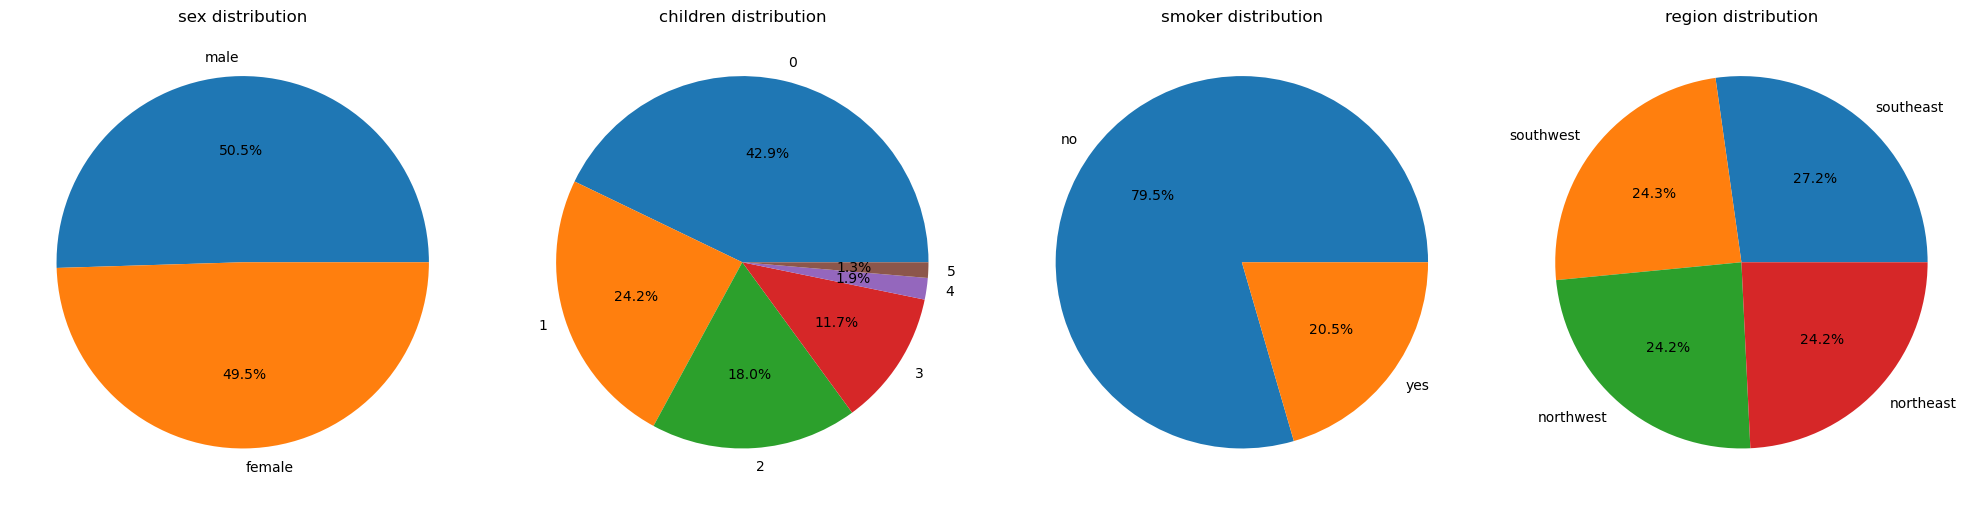

In [49]:
features=['sex','children','smoker','region']
plt.figure(figsize=(20,25))
plot=1
for i,col in enumerate(features):
    if plot<5:
        ax=plt.subplot(1,4,plot)
        x=df[col].value_counts()
        plt.pie(x.values,labels=x.index,autopct='%1.1f%%')
        plt.title(f'{col} distribution')
    plot=plot+1
plt.tight_layout()
plt.show()

## Insights: 
- as we can see that the % of male and females are equal
- number of childers having 0 childres are more 
- % of no smoker is higher than the smokers 
- region are distributed equal in percentage

### Univariate analysis for catagorical columns

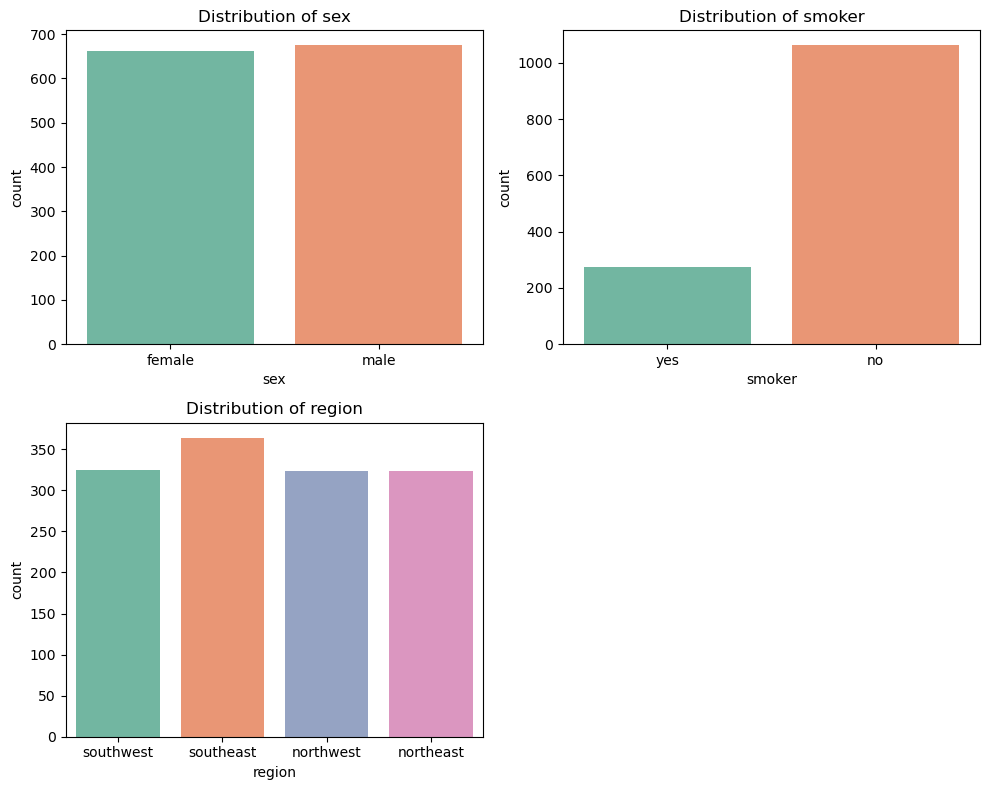

In [52]:
plt.figure(figsize=(10,8))
plot=1
for i in ['sex','smoker','region']:
    if plot<20:
        ax=plt.subplot(2,2,plot)
        sns.countplot(x=df[i],palette="Set2")
        plt.xlabel(i,fontsize=10)
        plt.title(f'Distribution of {i}')
    plot+=1
plt.tight_layout()
plt.show()

- Smoker : The premium for smokers is about three times  what's charged for non smokers
- Sex : this plot shows most customers are male, slightly more than females.
- Region : southeast peoples are most whos is insurance buyer

### Distribution plot for Charges

Text(0.5, 1.0, 'Distribution of Charges')

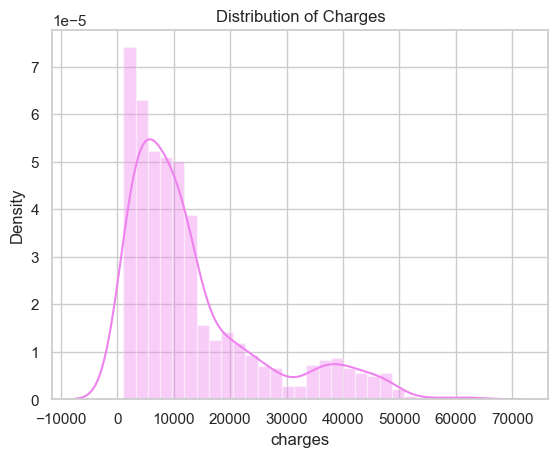

In [55]:
sns.set(style='whitegrid')
ax = sns.distplot(df['charges'], kde = True, color = 'violet')
plt.title('Distribution of Charges')

This distribution is right-skewed. To make it closer to normal we can apply natural log¶
From the above, we can see the dependent variable (charges) has a leptokurtic distribution. A leptokurtic distribution is more peaked and has longer tail than a normal distribution. This can cause problems in several ways.

It may lead to overestimation of extreme events or outliers, which can affect the performance and reliability of statistical models.
The presence of longer tail violate the assumptions linear regression models that typically assume a normal or approximately normal distributed dependent variable.
Estimation of parameters and inferences drawn from the data might be inaccurate.
Models built on such data might be overly sensitive to outliers and could have reduced generalization ability, meaning they might not perform well on new, unseean dat


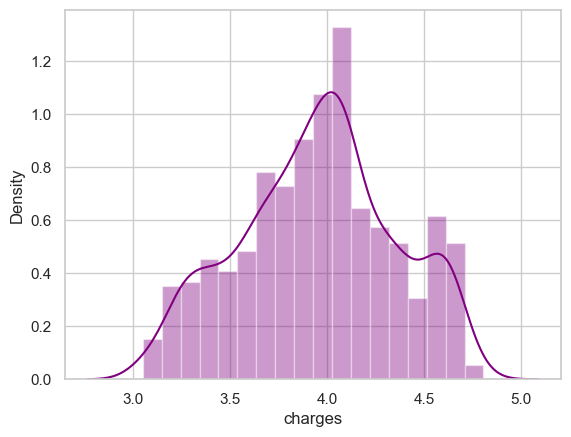

In [57]:
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'purple' )

### Distribution plot for BMI

Text(0.5, 1.0, 'Distribution of bmi')

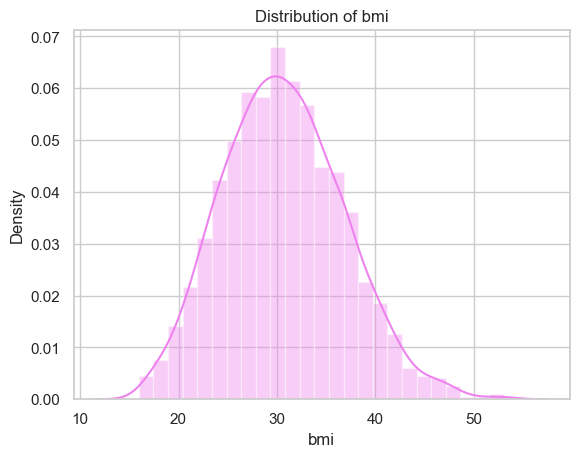

In [59]:
sns.set(style='whitegrid')
ax = sns.distplot(df['bmi'], kde = True, color = 'violet')
plt.title('Distribution of bmi')

Info about BMi:
- Below 18.5: Underweight 
- 18.5–24.9: Healthy weight 
- 25–29.9: Overweight 
- 30–39.9: Obese 
- 40 or above: Severely obese 
- bmi : BMI has nearly normal distribution ,with most values between 25-35 which might be indicate a slightly overweight.

### Distribution plot for Age

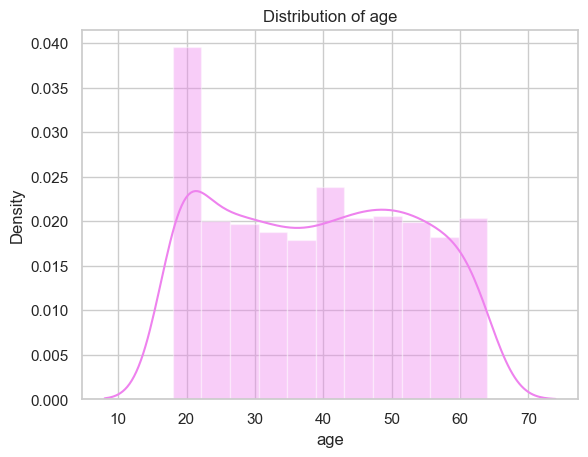

In [62]:
sns.set(style='whitegrid')
ax = sns.distplot(df['age'], kde = True, color = 'violet')
plt.title('Distribution of age')
plt.show()

- Age : the age column shows a slightly uniform distribution with peaks around younger and middle aged . older people are less affect.

### Distribution plot for children

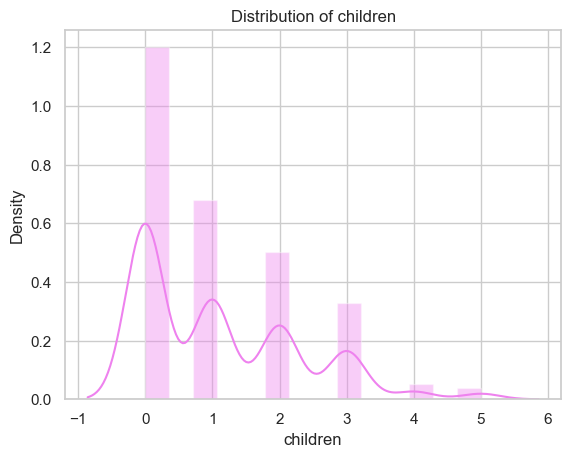

In [65]:
sns.set(style='whitegrid')
ax = sns.distplot(df['children'], kde = True, color = 'violet')
plt.title('Distribution of children')
plt.show()

- Children: the most of peoples have 0 or 1 children and only few peoples have more that 2 children.

## Bavariate Analysis

### Plotting (Age Vs Charges and Bmi Vs Charges) with Smoker

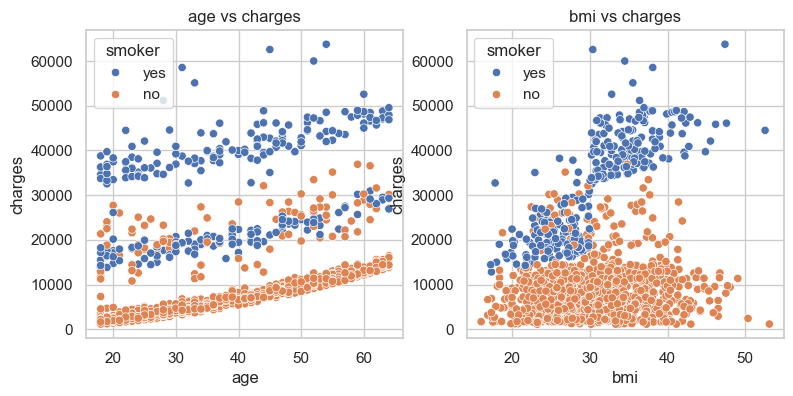

<Figure size 640x480 with 0 Axes>

In [69]:
plt.figure(figsize=(9,4))
plot=1
for i in df[['age','bmi']]:
    if plot<3:
        ax=plt.subplot(1,2,plot)
        sns.scatterplot(df,x=i,y='charges',hue='smoker')
        plt.title(f'{i} vs charges')
    plot=plot+1
plt.show()
plt.tight_layout()

## Insight : 
- this plot shows insurance charges increases with age ,younger people pay lower charges than older peoples
- older people might be  pay high charges beacuase of due to increased health risk - Patients who smoke pay higher charges.
- The premium prices increase with age of patients.
- For patients who don't smoke, there is no major difference in charges, regardless of their weight.
- For patients who smoke, as the BMI increases, the charges also increase.
- In non-smokers, the cost of treatment increases with age. That makes sense. So take care of your health, friends! In smoking people, we do not see such dependence.
- smokers : The plot shows that smokers have higher charges as age increases, indicating that smoking is a higher risk factor across different age groups.

### Plotting smoker vs. charges

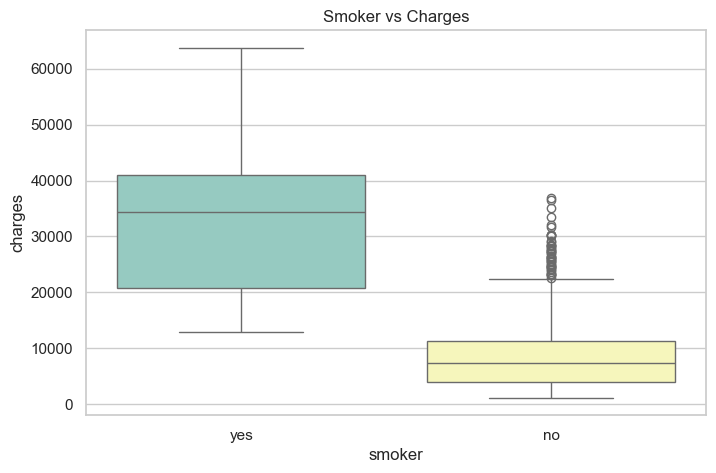

In [72]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges',palette = 'Set3' ,data=df)
plt.title('Smoker vs Charges')
plt.show()

## Insight  
- the plot shows smokers have highly charges compared to non smokers ,smokers may be pay higher charges due to increased health risk 

### Plotting Barplot sum of region Vs Charges

<Axes: xlabel='region', ylabel='charges'>

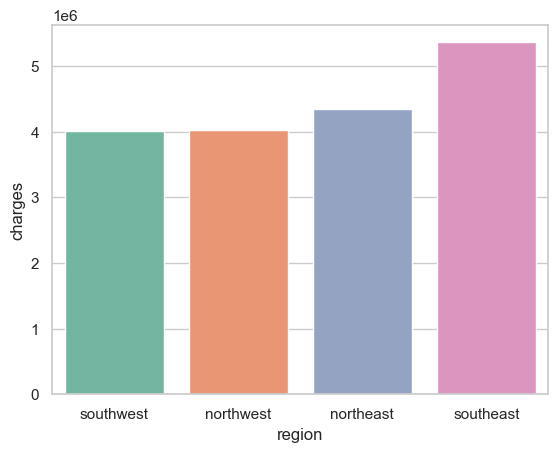

In [75]:
charges=df['charges'].groupby(df['region']).sum().sort_values(ascending=True)
charges=charges.head()
sns.barplot(x=charges.index,y=charges,palette='Set2')

So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

### Plotting Barplot ( Region Vs Charges) with Sex

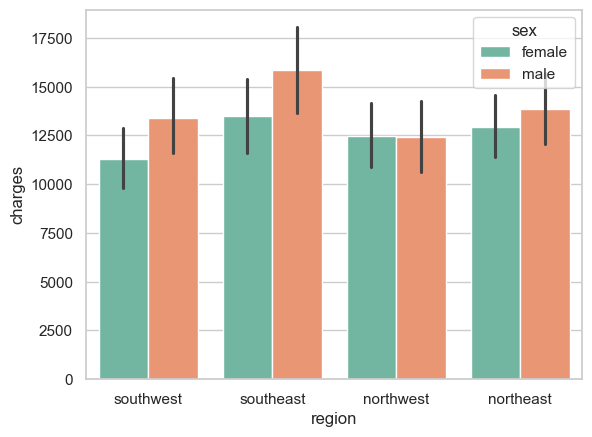

In [78]:
ax=sns.barplot(x='region',y='charges',hue='sex',data=df,palette='Set2')

male have to pay more amount than female in which region male have to pay more cost

### Plotting Barplot ( Region Vs Charges) with Smoker 

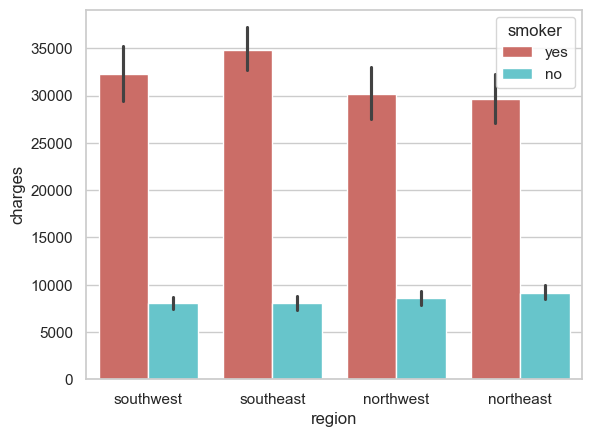

In [81]:
ax=sns.barplot(x='region',y='charges',hue='smoker',data=df,palette='hls')

As we can see southeast  region have to pay more charges bcz of more smokers are present than other regions 

### Plotting Barplot (Region Vs Charges) with Childrens 

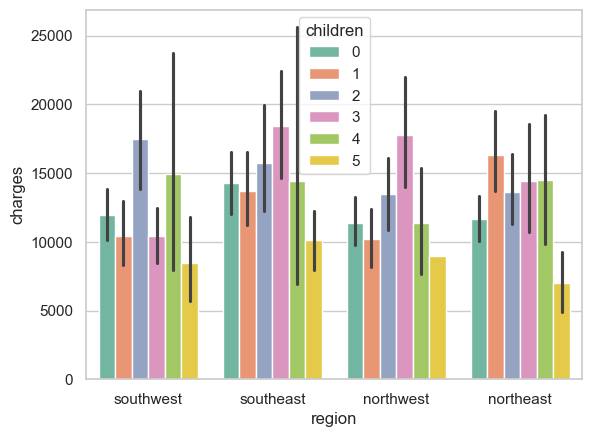

In [84]:
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set2')

we can see here the southeast has max count and those peoples having more childerns they have to pay more charges than those peoples having childern 0 and 1. 

## Multivariate analysis

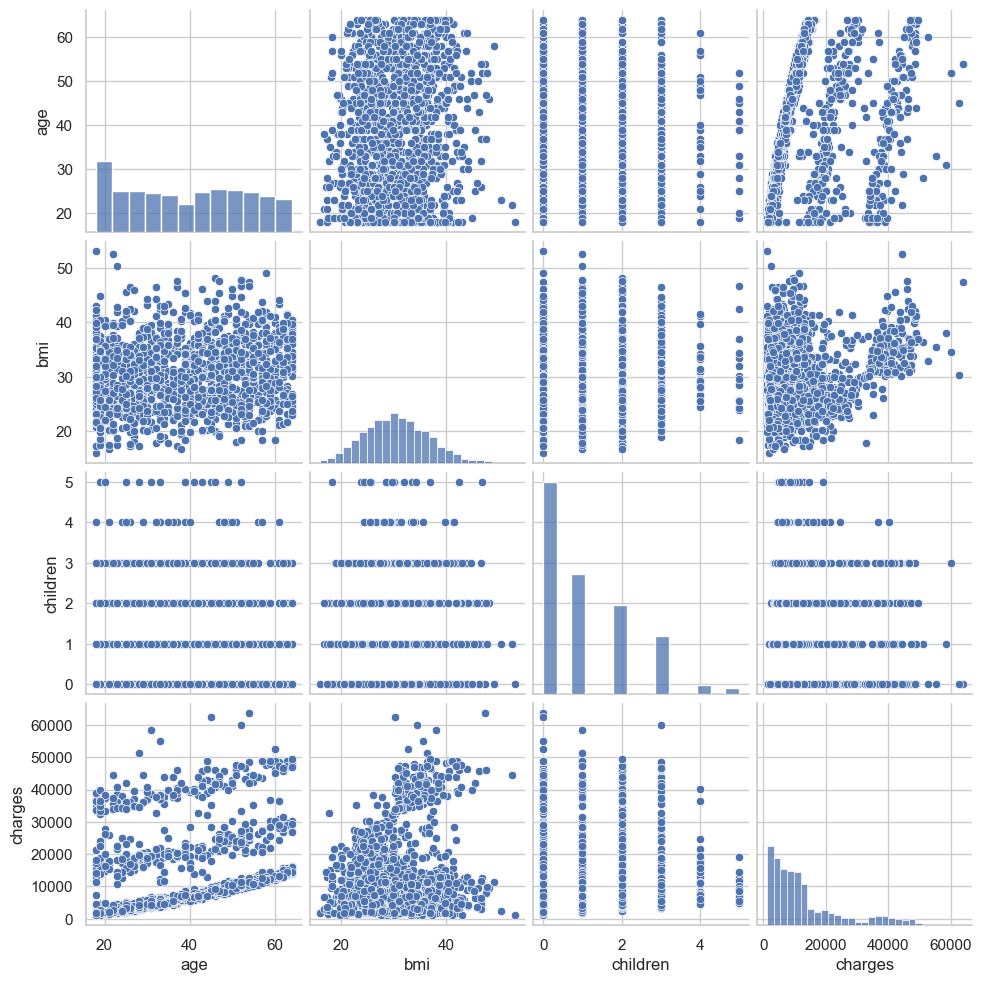

In [87]:
sns.pairplot(df)

## Insight : 
- charges increases with ages 
- higher bmi with increased charges 
- number of children has little impact on charges 
- outlier present with high charges above 40,000

# Data Preprocessing

### Finding Missing Values

In [91]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

hence, we have checked null values there is not null or missing values are present

### Converting categorical to numerical

In [94]:
df.select_dtypes(include='object')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


Dataset has catagorical columns (sex,smoker and region) we need to encode them into numeric values for machine learning models

In [96]:
df.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [97]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [98]:
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [99]:
# Encoding sex column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['sex'] = encoder.fit_transform(df['sex'])
df['smoker'] = encoder.fit_transform(df['smoker'])
df['region'] = encoder.fit_transform(df['region'])

print(df.head(3))

   age  sex    bmi  children  smoker  region     charges
0   19    0  27.90         0       1       3  16884.9240
1   18    1  33.77         1       0       2   1725.5523
2   28    1  33.00         3       0       2   4449.4620


In [100]:
df.sex.value_counts()

sex
1    675
0    662
Name: count, dtype: int64

In [101]:
df.region.value_counts()

region
2    364
3    325
1    324
0    324
Name: count, dtype: int64

In [102]:
df.smoker.value_counts()

smoker
0    1063
1     274
Name: count, dtype: int64

now you can see that, we have handled categorical values by converting it into numerical

### Checking for outliers

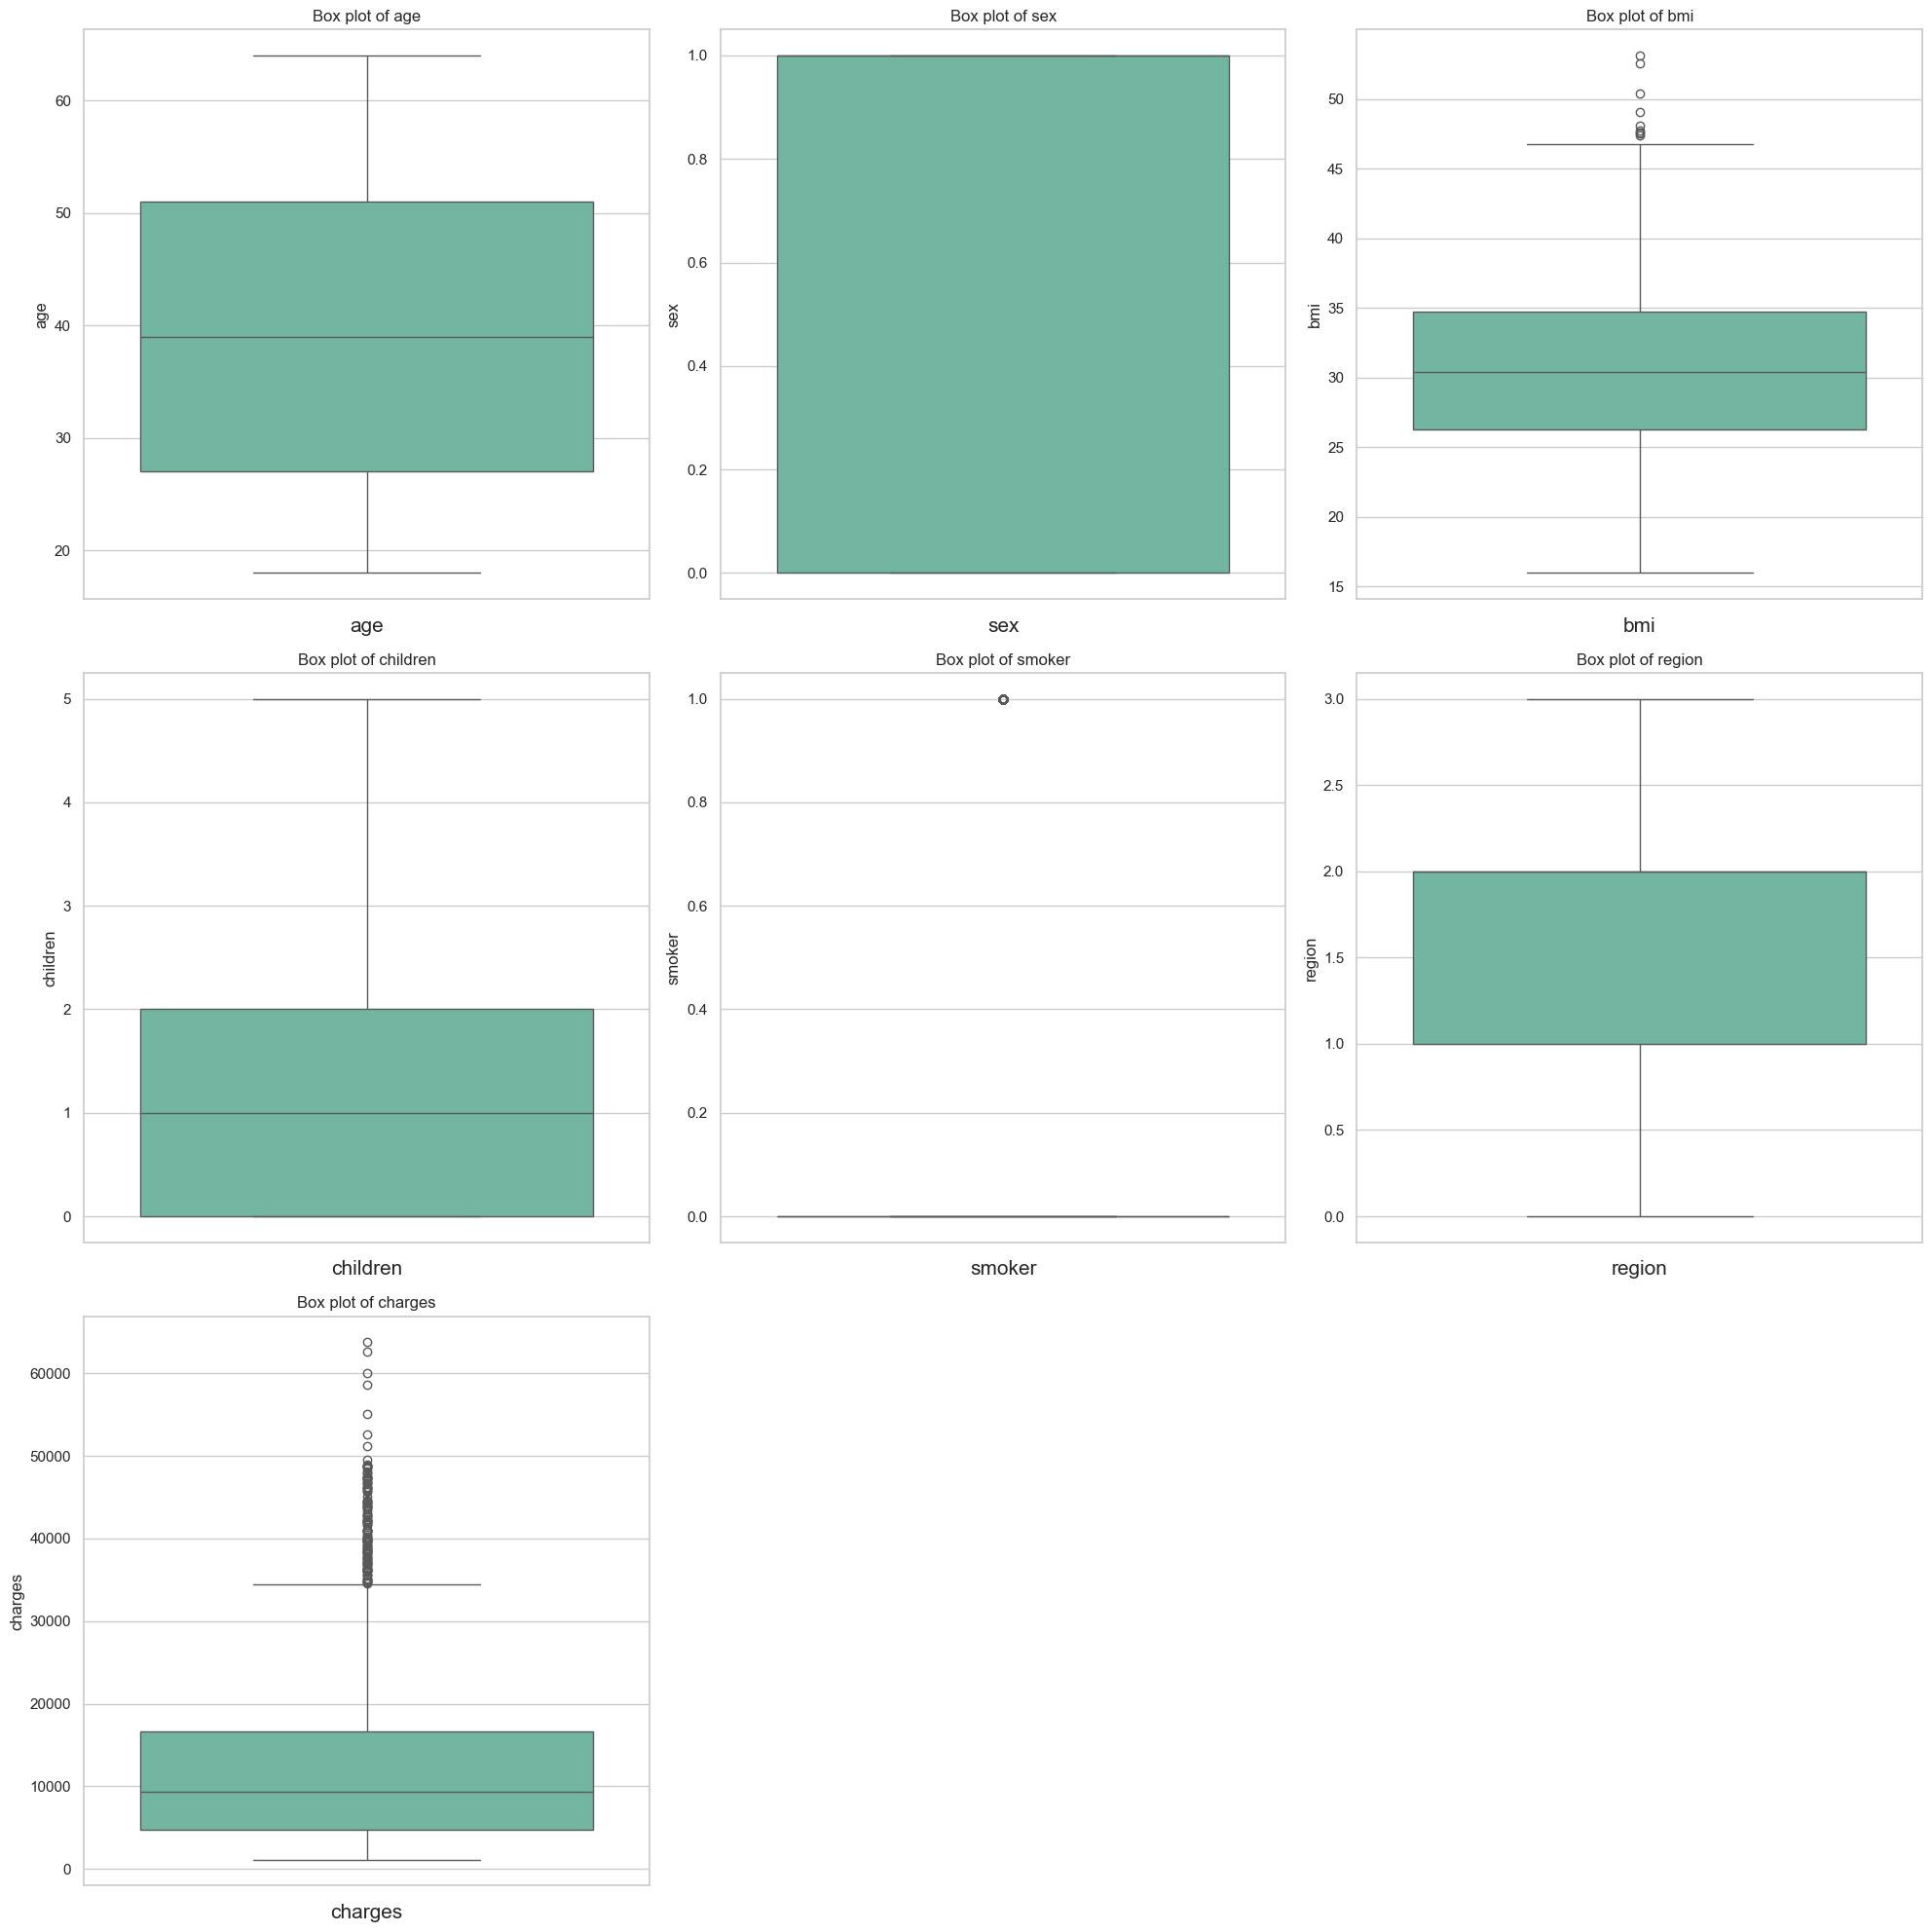

In [105]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df:
    if plotnumber<9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i],palette="Set2")
        plt.xlabel(i,fontsize=15)
        plt.title(f'Box plot of {i}')
    plotnumber+=1
plt.tight_layout()
plt.show()

### insight : 
- Age : There are no outliers, so age data is clean.
- Sex : this feature might have low imapct with charge
- BMI : BMI have some outloers present.
- children : There are no outliers, so children data is clean.
- smoker : The data might be very imbalanced (most of the people have not smoke, and only a few have smoke)
- region : no outlier present
- charges : The target variable is imbalanced.

### Handling Outliers using IQR Method 

In [108]:
Q1=df['bmi'].quantile(0.25)
print("Low quantile:",Q1)
Q3=df['bmi'].quantile(0.75)
print("Upper quantile:",Q3)
# find IQR
IQR=Q3-Q1
print(IQR)

Low quantile: 26.29
Upper quantile: 34.7
8.410000000000004


In [109]:
# find lower limit and upper limit
lower_limit=Q1-1.5*IQR
print("Lower Limit:",lower_limit)
upper_limit=Q3+1.5*IQR
print("Upper Limit:",upper_limit)

Lower Limit: 13.674999999999994
Upper Limit: 47.31500000000001


In [110]:
df.loc[df['bmi']<lower_limit]

,age,sex,bmi,children,smoker,region,charges


In [111]:
df.loc[df['bmi']>upper_limit]

,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,0,2,11381.32540
286,46,0,48.07,2,0,0,9432.92530
401,47,1,47.52,1,0,2,8083.91980
543,54,0,47.41,0,1,2,63770.42801
847,23,1,50.38,1,0,2,2438.05520
860,37,0,47.60,2,1,3,46113.51100
1047,22,1,52.58,1,1,2,44501.39820
1088,52,1,47.74,1,0,2,9748.91060
1317,18,1,53.13,0,0,2,1163.46270


In [112]:
#Replace outliers with median because data is not normally distributed
df.loc[df['bmi']>upper_limit,'bmi']=df["bmi"].median()

<Axes: xlabel='bmi'>

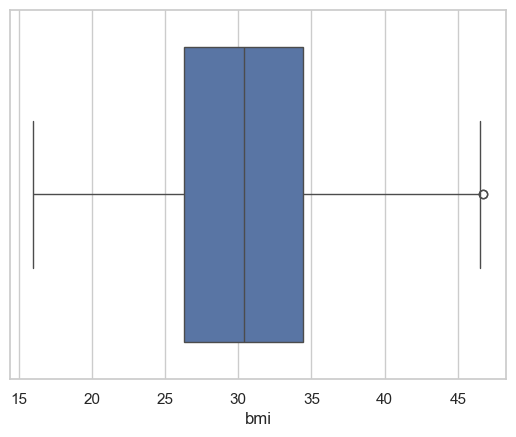

In [113]:
sns.boxplot(x='bmi',data=df)

<Axes: xlabel='bmi', ylabel='Count'>

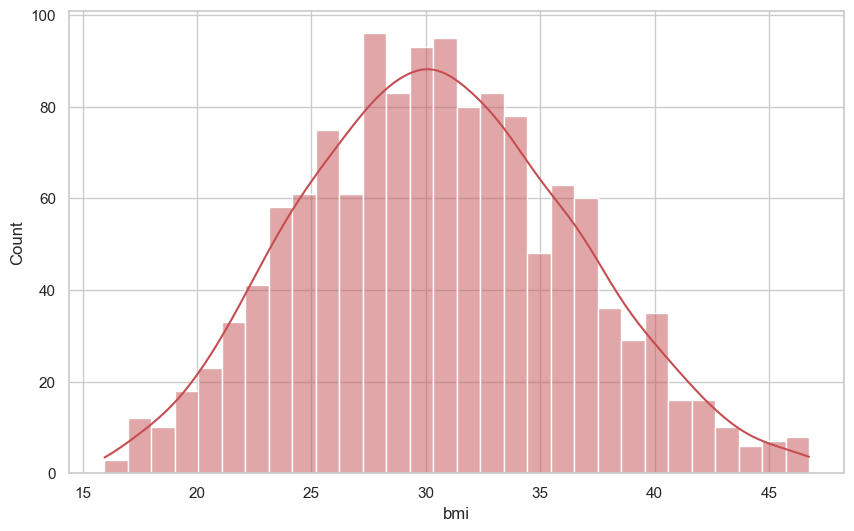

In [114]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True, color='r', bins=30)

In [115]:
skewness_age = df['age'].skew()
skewness_bmi = df['bmi'].skew()
skewness_charges = df['charges'].skew()

print(f"Skewness of Age: {skewness_age}")
print(f"Skewness of BMI: {skewness_bmi}")
print(f"Skewness of Charges: {skewness_charges}")

Skewness of Age: 0.054780773126998195
Skewness of BMI: 0.15814069198039665
Skewness of Charges: 1.5153909108403483


# Feature Engineering/feature selection

In [117]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.114375,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.039781,0.017848,0.076596,0.004936,0.058044
bmi,0.114375,0.039781,1.000000,0.017369,-0.002903,0.155516,0.190713
children,0.041536,0.017848,0.017369,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,-0.002903,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.155516,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.190713,0.067389,0.787234,-0.006547,1.000000


<Axes: >

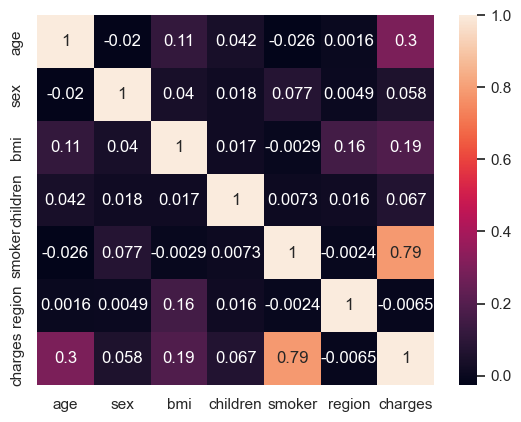

In [118]:
sns.heatmap(df.corr(),annot=True)

## insight :
#### from the above heatmap :
- smoker feature shows strong positve correlation with charges (0.79) 
- age feature shows moderately correlated with charges (0.30)
- BMI has a weak positive correalted with charges (0.19)
- Features with low correlation to charges
- region: Correlation is -0.0065
- sex: Correlation is 0.08
- children: Correlation is 0.067.
- Charges greatly depends upon features Age and Smoker.

### Splitting data into training and testing

In [121]:
# Splitting the data 
x = df.drop('charges', axis=1)
y = df['charges']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [122]:
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (1069, 6)
Testing set shape: (268, 6)


In [123]:
print("Training set shape:", y_train.shape)
print("Testing set shape:", y_test.shape)

Training set shape: (1069,)
Testing set shape: (268,)


## Feature Scaling:

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [126]:
x_train_scaled

array([[-1.1576804 ,  0.97140947, -1.00919236, -0.90790804, -0.50029231,
        -1.38394601],
       [-1.30061876,  0.97140947, -0.798661  ,  0.7669042 , -0.50029231,
        -1.38394601],
       [ 0.91492586, -1.029432  ,  1.20948432,  0.7669042 , -0.50029231,
        -0.47798258],
       ...,
       [-1.37208794,  0.97140947, -1.43707392, -0.07050192, -0.50029231,
         1.33394429],
       [-0.08564268, -1.029432  , -0.41424948,  1.60431032, -0.50029231,
         1.33394429],
       [-0.30005022, -1.029432  ,  0.92565053,  0.7669042 , -0.50029231,
         0.42798086]])

In [127]:
x_test_scaled

array([[ 0.70051832,  0.97140947, -1.34928149, -0.90790804, -0.50029231,
        -1.38394601],
       [-0.72886531, -1.029432  , -0.82337925,  2.44171645, -0.50029231,
         1.33394429],
       [ 0.84345668, -1.029432  ,  1.01514767,  1.60431032, -0.50029231,
        -0.47798258],
       ...,
       [-1.22914958, -1.029432  ,  0.70744799,  0.7669042 , -0.50029231,
        -1.38394601],
       [ 1.5581485 ,  0.97140947,  1.00065766, -0.07050192,  1.99883143,
         1.33394429],
       [ 0.55757996, -1.029432  , -1.0415818 , -0.90790804, -0.50029231,
        -1.38394601]])

In [128]:
y_train

1114     2396.09590
968      3279.86855
599     33471.97189
170     13405.39030
275      9715.84100
           ...     
1096    44641.19740
1131     3693.42800
1295     1964.78000
861      7151.09200
1127     5836.52040
Name: charges, Length: 1069, dtype: float64

In [129]:
y_test

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
534     13831.11520
542     13887.20400
760      3925.75820
1284    47403.88000
1285     8534.67180
Name: charges, Length: 268, dtype: float64

In [130]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


# Model Creation 

### Linear Regression

In [133]:
# Train Linear Regression Model
regressor = LinearRegression()
regressor.fit(x_train_scaled, y_train)

LinearRegression()

In [134]:
# Predictions
train_pred_lr = regressor.predict(x_train_scaled)
test_pred_lr = regressor.predict(x_test_scaled)

# Metrics
r2_train_lr = r2_score(y_train, train_pred_lr)
r2_test_lr = r2_score(y_test, test_pred_lr)
mae_lr = mean_absolute_error(y_test, test_pred_lr)
mse_lr = mean_squared_error(y_test, test_pred_lr)
rmse_lr = math.sqrt(mse_lr)

# Print Results
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")
print(f"R2 Train Score: {r2_train_lr}")
print(f"R2 Test Score: {r2_test_lr}")

Mean Absolute Error (MAE): 4230.451743533911
Mean Squared Error (MSE): 36824622.338285506
Root Mean Squared Error (RMSE): 6068.329452022649
R2 Train Score: 0.7302883845673043
R2 Test Score: 0.7996005055373345


## Compare actual vs. predicted values using a scatter plot.

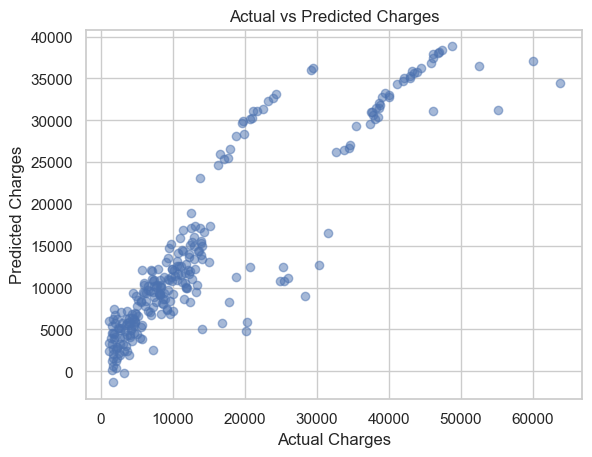

In [136]:
import matplotlib.pyplot as plt

plt.scatter(y_test, test_pred_lr, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()


## Improve the Model

To improve the model's performance, we can explore feature engineering, advanced regression techniques (e.g., Ridge, Lasso), and hyperparameter tuning. We'll proceed step by step.

### Train Ridge and Lasso Regression Models

Ridge and Lasso are advanced linear regression techniques that help in handling multicollinearity and feature selection.

### Train Ridge Regression

In [142]:
from sklearn.linear_model import Ridge

# Initialize Ridge model with alpha (regularization strength)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train_scaled, y_train)

# Predict and evaluate Ridge
ridge_train_pred = ridge_model.predict(x_train_scaled)
ridge_test_pred = ridge_model.predict(x_test_scaled)

# Train and Test R² scores for Ridge
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)

print(f"Ridge Regression Train R2 Score: {ridge_train_r2}")
print(f"Ridge Regression Test R2 Score: {ridge_test_r2}")

Ridge Regression Train R2 Score: 0.7302877267293653
Ridge Regression Test R2 Score: 0.7994150302470983


### Train Lasso Regression

In [144]:
from sklearn.linear_model import Lasso

# Initialize Lasso model with alpha
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_train_scaled, y_train)

# Predict and evaluate Lasso
lasso_train_pred = lasso_model.predict(x_train_scaled)
lasso_test_pred = lasso_model.predict(x_test_scaled)

# Train and Test R² scores for Lasso
lasso_train_r2 = r2_score(y_train, lasso_train_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)

print(f"Lasso Regression Train R2 Score: {lasso_train_r2}")
print(f"Lasso Regression Test R2 Score: {lasso_test_r2}")


Lasso Regression Train R2 Score: 0.730288384562751
Lasso Regression Test R2 Score: 0.7996001722521462


## Compare Models

In [146]:
# Display comparison
print(f"Linear Regression R² Score: {r2_test_lr}")
print(f"Ridge Regression R² Score: {ridge_test_r2}")
print(f"Lasso Regression R² Score: {lasso_test_r2}")

Linear Regression R² Score: 0.7996005055373345
Ridge Regression R² Score: 0.7994150302470983
Lasso Regression R² Score: 0.7996001722521462


## No significant improvement is gained by adding regularization (Ridge/Lasso).

### now we use some advanced algorithms that are well-suited for regression problems:

## Dicision Tree

In [150]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Model
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(x_train_scaled, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [151]:
# Predictions
train_pred_dt = dt.predict(x_train_scaled)
test_pred_dt = dt.predict(x_test_scaled)


# Metrics
r2_train_dt = r2_score(y_train, train_pred_dt)
r2_test_dt = r2_score(y_test, test_pred_dt)
mae_dt = mean_absolute_error(y_test, test_pred_dt)
mse_dt = mean_squared_error(y_test, test_pred_dt)
rmse_dt = math.sqrt(mse_dt)

# Print Results
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt}")
print(f"R2 Train Score: {r2_train_dt}")
print(f"R2 Test Score: {r2_test_dt}")

Mean Absolute Error (MAE): 2565.698174480738
Mean Squared Error (MSE): 18891373.873607237
Root Mean Squared Error (RMSE): 4346.420811841306
R2 Train Score: 0.8680868764636898
R2 Test Score: 0.8971931948358344


## Random Forest

In [153]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [154]:
# Predictions
train_pred_rf = rf.predict(x_train_scaled)
test_pred_rf = rf.predict(x_test_scaled)

# Metrics
r2_train_rf = r2_score(y_train, train_pred_rf)
r2_test_rf = r2_score(y_test, test_pred_rf)
mae_rf = mean_absolute_error(y_test, test_pred_rf)
mse_rf = mean_squared_error(y_test, test_pred_rf)
rmse_rf = math.sqrt(mse_rf)

# Print Results
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R2 Train Score: {r2_train_rf}")
print(f"R2 Test Score: {r2_test_rf}")                   

Mean Absolute Error (MAE): 2538.224663539925
Mean Squared Error (MSE): 20717524.039225288
Root Mean Squared Error (RMSE): 4551.650693893951
R2 Train Score: 0.9736690525644268
R2 Test Score: 0.887255290608578


- The Random Forest model performs well on training data with an R-squared value of 97.36%, but testing accuracy shows(88.72%),
indicating some overfitting. 
- Overfitting is shown by the large difference between training and test performance.

### Gradient Boosting

In [157]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Model
gb = GradientBoostingRegressor(max_depth=4, random_state=42)
gb.fit(x_train_scaled, y_train)

GradientBoostingRegressor(max_depth=4, random_state=42)

In [158]:
# Predictions
train_pred_gb = gb.predict(x_train_scaled)
test_pred_gb = gb.predict(x_test_scaled)

r2_train_gb = r2_score(y_train, train_pred_gb)
r2_test_gb = r2_score(y_test, test_pred_gb)
mae_gb = mean_absolute_error(y_test, test_pred_gb)
mse_gb = mean_squared_error(y_test, test_pred_gb)
rmse_gb = math.sqrt(mse_gb)

# Print Results
print(f"Mean Absolute Error (MAE): {mae_gb}")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb}")
print(f"R2 Train Score: {r2_train_gb}")
print(f"R2 Test Score: {r2_test_gb}")                   

Mean Absolute Error (MAE): 2386.18339855387
Mean Squared Error (MSE): 17804832.107241042
Root Mean Squared Error (RMSE): 4219.577242715322
R2 Train Score: 0.924335101994312
R2 Test Score: 0.9031061521688951


##  XGBoost

In [160]:
# XGBoost
from xgboost import XGBRegressor

# Train XGBoost Model
xgb = XGBRegressor(random_state=42)
xgb.fit(x_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [161]:
# Predictions
train_pred_xgb = xgb.predict(x_train_scaled)
test_pred_xgb = xgb.predict(x_test_scaled)

# Metrics
r2_train_xgb = r2_score(y_train, train_pred_xgb)
r2_test_xgb = r2_score(y_test, test_pred_xgb)
mae_xgb = mean_absolute_error(y_test, test_pred_xgb)
mse_xgb = mean_squared_error(y_test, test_pred_xgb)
rmse_xgb = math.sqrt(mse_xgb)

# Print Results
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R2 Train Score: {r2_train_xgb}")
print(f"R2 Test Score: {r2_test_xgb}")                   

Mean Absolute Error (MAE): 2735.489144467613
Mean Squared Error (MSE): 23988695.042830832
Root Mean Squared Error (RMSE): 4897.825542302506
R2 Train Score: 0.9958045556511034
R2 Test Score: 0.8694535869169169


### Support Vector Regressor (SVR)

In [163]:
# Support Vector Regressor
from sklearn.svm import SVR

# Train SVR Model
svr = SVR(kernel='rbf')
svr.fit(x_train_scaled, y_train)

SVR()

In [164]:
# Predictions
train_pred_svr = svr.predict(x_train_scaled)
test_pred_svr = svr.predict(x_test_scaled)

# Metrics
r2_train_svr = r2_score(y_train, train_pred_svr)
r2_test_svr = r2_score(y_test, test_pred_svr)
mae_svr = mean_absolute_error(y_test, test_pred_svr)
mse_svr = mean_squared_error(y_test, test_pred_svr)
rmse_svr = math.sqrt(mse_svr)

# Print Results
print(f"Mean Absolute Error (MAE): {mae_svr}")
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr}")
print(f"R2 Train Score: {r2_train_svr}")
print(f"R2 Test Score: {r2_test_svr}")                   

Mean Absolute Error (MAE): 9252.965783772775
Mean Squared Error (MSE): 207613463.3025696
Root Mean Squared Error (RMSE): 14408.798121376036
R2 Train Score: -0.09653590082222419
R2 Test Score: -0.12983190179853987


## K-Nearest Neighbors

In [166]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

# Train KNN Model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [167]:
# Predictions
train_pred_knn = knn.predict(x_train_scaled)
test_pred_knn = knn.predict(x_test_scaled)

# Metrics
r2_train_knn = r2_score(y_train, train_pred_knn)
r2_test_knn = r2_score(y_test, test_pred_knn)
mae_knn = mean_absolute_error(y_test, test_pred_knn)
mse_knn = mean_squared_error(y_test, test_pred_knn)
rmse_knn = math.sqrt(mse_knn)

# Print Results
print(f"Mean Absolute Error (MAE): {mae_knn}")
print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn}")
print(f"R2 Train Score: {r2_train_knn}")
print(f"R2 Test Score: {r2_test_knn}")       

Mean Absolute Error (MAE): 3142.8741877499997
Mean Squared Error (MSE): 27479221.74090672
Root Mean Squared Error (RMSE): 5242.06273721583
R2 Train Score: 0.8580984221220509
R2 Test Score: 0.8504581501334256


### Create a DataFrame for Training And testing model comparison

In [169]:
# Create a DataFrame for model comparison
models_comparison = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "Decision Tree Regressor",
              "Gradient Boosting Regressor", "XGBoost", "K-Nearest Neighbors (KNR)", "Support Vector Regressor (SVR)"],
    "Train R2 Score": [0.730, 0.730, 0.730, 0.868, 0.924, 0.995, 0.858, -0.096],
    "Test R2 Score": [ 0.799, 0.799, 0.799, 0.897, 0.903, 0.869, 0.850, -0.129]
}

# Convert dictionary to a DataFrame
metrics_df = pd.DataFrame(models_comparison)

# Display the table
metrics_df

,Model,Train R2 Score,Test R2 Score
0,Linear Regression,0.730,0.799
1,Ridge Regression,0.730,0.799
2,Lasso Regression,0.730,0.799
3,Decision Tree Regressor,0.868,0.897
4,Gradient Boosting Regressor,0.924,0.903
5,XGBoost,0.995,0.869
6,K-Nearest Neighbors (KNR),0.858,0.850
7,Support Vector Regressor (SVR),-0.096,-0.129


### From Above chart Insights : 
- linear regression has the training score (0.73) and testing score is (0.79) shows underfitting.
- Ridge Regression has  the training score (0.73) and testing score is (0.79) shows underfitting. 
- Lasso Regression has  the training score (0.73) and testing score is (0.799) shows underfitting.
- Decision Tree Regressor has the training score (0.86) but tesing score is (0.89) shows underfitting because of its test score (0.89) is higher than the train score (0.86).
- Gradient Boosting Regressor performs best on the test data with an R2 score of (0.90). It also has a good train score with(0.92)
- XGBoost has the highest training score (0.99), but its testing score (0.86) suggests overfitting.
- K-Nearest Neighbors (KNR)	has training score is (0.85) and testing score is (0.85) shows balanced result.
- Support Vector Regressor (SVR) has training score is (-0.09) and testing score is (-0.12)  performs poorly with negative train test score ,this model performs bad for this dataset.

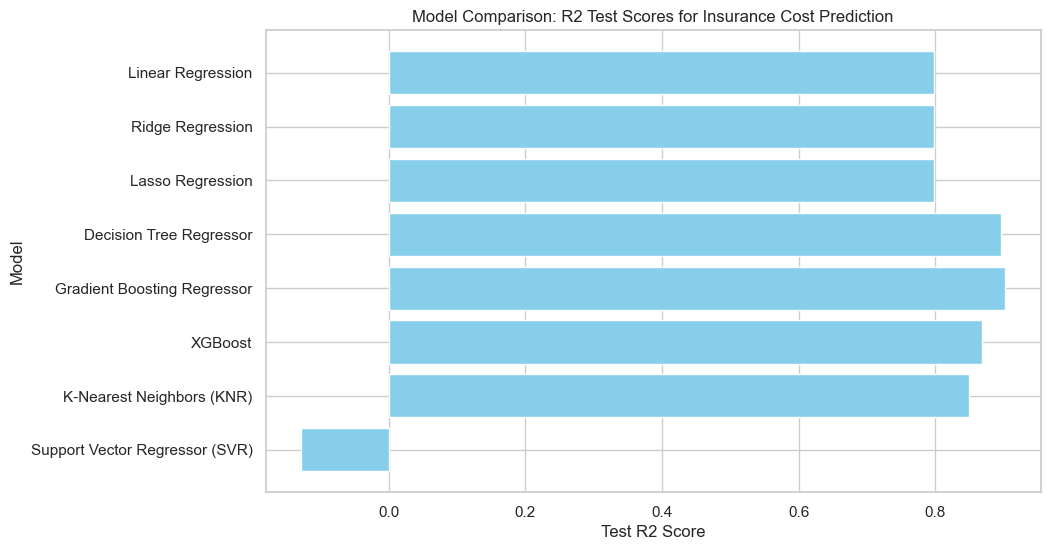

In [185]:
import matplotlib.pyplot as plt

# Plot R2 Test Scores
plt.figure(figsize=(10, 6))
plt.barh(metrics_df["Model"], metrics_df["Test R2 Score"], color="skyblue")
plt.xlabel("Test R2 Score")
plt.ylabel("Model")
plt.title("Model Comparison: R2 Test Scores for Insurance Cost Prediction")
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()

## Insights
- The table and visualization will clearly show which model performed the best based on the R2 Test Score.
- this is selecting the best-performing model( Gradient Boosting Regressor).

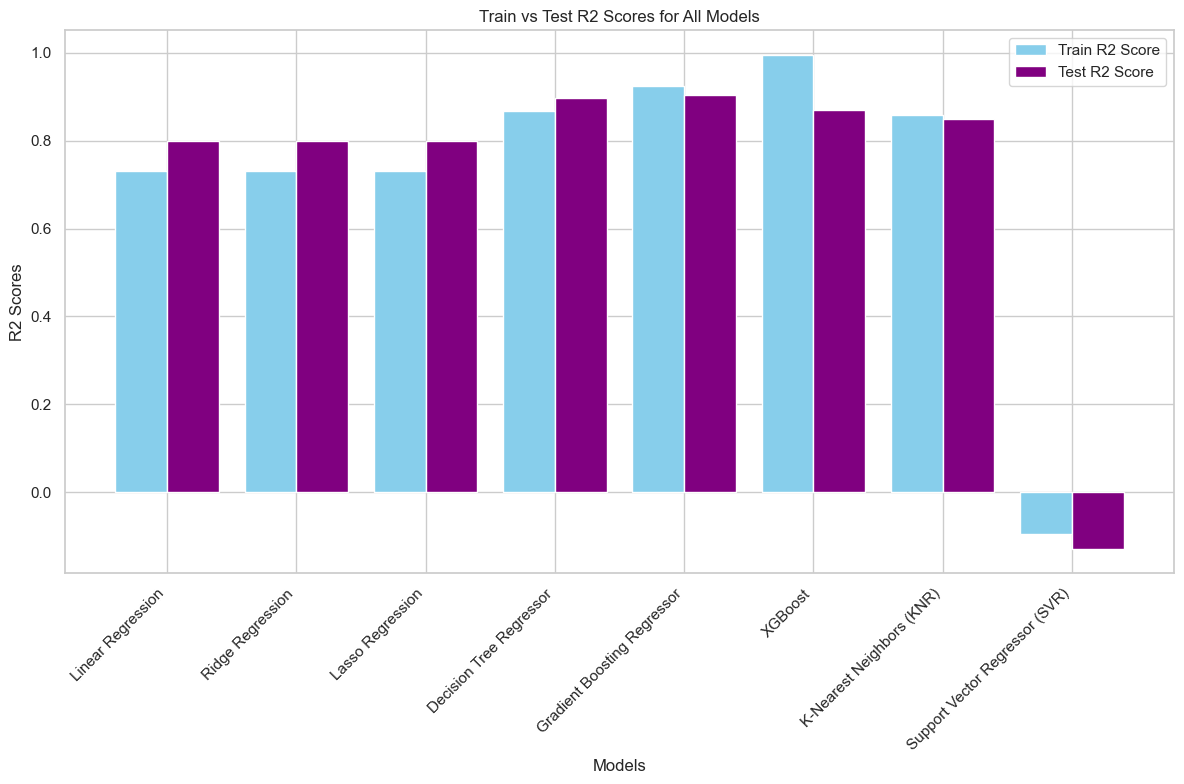

In [188]:
# Plot Train and Test R² Scores
plt.figure(figsize=(12, 8))
bar_width = 0.4  # Width of each bar
index = range(len(metrics_df))  # Index for each model

# Bar plots
plt.bar(index, metrics_df["Train R2 Score"], width=bar_width, label="Train R2 Score", color="skyblue")
plt.bar([i + bar_width for i in index], metrics_df["Test R2 Score"], width=bar_width, label="Test R2 Score", color="purple")

# Add labels and title
plt.xlabel("Models")
plt.ylabel("R2 Scores")
plt.title("Train vs Test R2 Scores for All Models")
plt.xticks([i + bar_width / 2 for i in index], metrics_df["Model"], rotation=45, ha="right")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### To further improve the Gradient Boosting model 
### I will use GridSearchCV for finding the best hyperparameters. 

In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# Define the Gradient Boosting model
GB_Model = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for tuning
param_grid= {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.03, 0.05],
            'max_depth': [2, 3, 4],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
       
 }
# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=GB_Model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Train the model with the best parameters
best_GB_Model = grid_search.best_estimator_

# Predict and evaluate on training set
train_pred_GB_Model = best_GB_Model.predict(x_train_scaled)
r2_train_GB_Model = r2_score(y_train, train_pred_GB_Model)
print(f'R squared value (Train): {r2_train_GB_Model}')

# Predict and evaluate on test set
test_pred_GB_Model = best_GB_Model.predict(x_test_scaled)
r2_test_GB_Model = r2_score(y_test, test_pred_GB_Model)
print(f'R squared value (Test): {r2_test_GB_Model}')

# Calculate additional metrics
mae = mean_absolute_error(y_test, test_pred_GB_Model)
mse = mean_squared_error(y_test, test_pred_GB_Model)
rmse = math.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'learning_rate': 0.03, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross-Validation Score: -21357932.424363155
R squared value (Train): 0.8692057901475937
R squared value (Test): 0.8985654610549272
Mean Absolute Error (MAE): 2527.759095872633
Mean Squared Error (MSE): 18639211.634370185
Root Mean Squared Error (RMSE): 4317.31532718774


## Compare and Select the Best Model
### Insights from Hypertuning Results
- Gradient Boosting Regressor has the highest R2 Test Score (0.9031) in the initial evaluation.
- After hypertuning, Random Forest achieved the best Test R2 Score (0.9013), with the lowest MAE and RMSE among the tuned models.
- XGBoost closely follows Gradient Boosting in terms of performance, with slightly better error metrics.
## Decision:
- Choose Gradient Boosting Regressor as the final model due to its highest overall R2 Test Score.

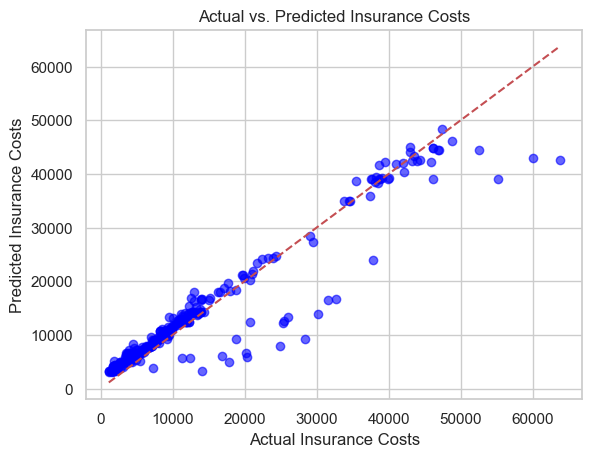

In [197]:
# Plotting Actual vs. Predicted values
plt.scatter(y_test, test_pred_GB_Model, alpha=0.6, color="blue")  # Use test_pred_GB_Model for predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "r--")  # Line representing perfect predictions
plt.xlabel("Actual Insurance Costs")
plt.ylabel("Predicted Insurance Costs")
plt.title("Actual vs. Predicted Insurance Costs")
plt.show()

## Deployment: Save and Load the Model

In [201]:
import pickle

# Save the best model (after GridSearchCV tuning)
filename = 'Insurance_Cost_Prediction_Model.pkl'
pickle.dump(best_GB_Model, open(filename, 'wb'))

# Prediction on New Data

In [182]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


In [203]:
new_data =pd.DataFrame({
    'age': 18.0, 'sex': 'male', 'bmi': 33.77, 'children': 1.0, 'smoker': 'no', 'region': 'southeast',
}, index=[0])

new_data['sex'] = new_data['sex'].map({'male': 0, 'female': 1})
new_data['smoker'] = new_data['smoker'].map({'yes': 1, 'no': 0})
new_data['region'] = new_data['region'].map({'southeast':0,'southwest':1,'northeast':2,'northwest':3})

print('Predicted Charge:', best_GB_Model.predict(new_data))

Predicted Charge: [16572.35433356]


In [205]:
new_data =pd.DataFrame({
    'age': 19.0, 'sex': 'female', 'bmi': 27.90, 'children': 0.0, 'smoker': 'yes', 'region': 'southwest',
},index=[1])

new_data['sex'] = new_data['sex'].map({'male': 0, 'female': 1})
new_data['smoker'] = new_data['smoker'].map({'yes': 1, 'no': 0})
new_data['region'] = new_data['region'].map({'southeast':0,'southwest':1,'northeast':2,'northwest':3})

print('Predicted Charge:', best_GB_Model.predict(new_data))

Predicted Charge: [47495.40315894]


In [207]:
new_data =pd.DataFrame({
    'age': 28.0, 'sex': 'male', 'bmi': 33.000, 'children': 3.0, 'smoker': 'no', 'region': 'southeast',
},index=[2])

new_data['sex'] = new_data['sex'].map({'male': 0, 'female': 1})
new_data['smoker'] = new_data['smoker'].map({'yes': 1, 'no': 0})
new_data['region'] = new_data['region'].map({'southeast':0,'southwest':1,'northeast':2,'northwest':3})

print('Predicted Charge:', best_GB_Model.predict(new_data))

Predicted Charge: [20842.97824035]


# Insurance Cost Prediction: Project Report

## 1. Introduction
In this project, we aim to predict the insurance charges for individuals based on various features such as their age, sex, BMI (body mass index), the number of children, whether they smoke, and their region. The model will help insurance companies estimate the charges for individuals, assisting in price determination and risk management. The dataset we are using contains historical data of individuals and their corresponding insurance costs, and the goal is to build a model that can predict the charges for new, unseen data.

## 2.Dataset Overview

#### The dataset we used insurance cost Prediction which includes the following features
- Age: The age of the person covered by the insurance (the primary beneficiary).
- Sex: The gender of the insurance holder (male or female)
-  BMI: The Body Mass Index, which is a measure of body fat based on weight and height. A BMI between 18.5 and 24.9 is considered healthy
-  Children: The number of children or dependents covered by the insurance
-  Smoker: Whether the person smokes or not
-  Region: The region where the person lives in the US, which could be northeast, southeast, southwest, or northwest
-  Charges: The actual medical costs billed by the health insurance (Target feature)

### 3. Problem Understanding
The main problem is predicting the insurance charges, which is a regression problem (predicting a continuous value). The model needs to take into account all the features and learn how they influence the insurance cost. This problem also involves handling missing values, scaling numerical features, and encoding categorical features to prepare the data for machine learning models.

# Report on Challenges Faced

- In this project, we faced several challenges while working with the data and building predictive models. Here’s a detailed report of the challenges.

### Data Preprocessing

### Missing or Null Values

- While working on this dataset,In Basic checks was to see if there were any missing or null values in the data. Missing values can negatively impact the performance of machine learning models.

- this dataset had no missing values. If there were any, techniques like imputing missing values using the mean/median for numerical columns or the mode for categorical columns would have been applied.

### Handled Duplicate Data and Checked Data curruption

- One duplicated row was present in this dataset, which we handled using the drop method #Both categorical and numerical columns are correctly assigned based on their data types.

### Performing EDA (Explorarory Data Analysis)

- In this dataset we Analyse numerical and catagorial column using various plots and chekcs relation between two features. Also we Analysed Using univariate , Bivariate and multivariate by plotting the graphs and also we mentioned each insights below the graphs.

### Outliers Handling

- Some outliers were present in the BMI column, and the charges column had extreme outliers.
possibly due to smoking or having a high BMI.

- In this project ,BMI column we handled Outliers outliers were not in our target feature (charges) column because high medical bills, which are important for accurate predictions.

### Converting Categorical Data

- The dataset included categories like sex, smoker, and region, which machines can’t understand directly. So we converted these catagories into numerical using encoding technique.

### Challenges in Feature Selection

 - We analyzed the relationships between features using a heatmap. This helped us understand which features, like Age, bmi, and smoker, were most important for Prediction.

### Scaling:
- We scaled the features using Standard Scaler. This step ensures that all features are on a similar scale, which helps improve the performance of many machine learning models.

## Model Selection
- We tried different machine learning models for this regression problem:

We chose Gradient Boosting Regressor for its strong performance on various types of regression tasks, its ability to handle non-linear relationships, and its resilience to overfitting.

### Overfitting/Underfitting:
- During training, there was a risk of overfitting the model on the training data

### Hyperparameter Tuning
We used GridSearchCV to perform hyperparameter tuning on the Gradient Boosting model. This step involved searching for the best combination of parameters (such as the number of estimators, learning rate, and max depth of trees) to maximize the model’s performance.

## Model Deployment

Once the model was trained and evaluated, we saved the model using pickle. This allows us to load the model and make predictions on new, unseen data without retraining the model each time.

# Conclusion

In conclusion, this project successfully demonstrates the process of building a predictive model for insurance cost estimation. By leveraging machine learning techniques, specifically Gradient Boosting Regressor, we were able to effectively model the relationship between various features (such as age, gender, BMI, smoker status, etc.) and the target variable—insurance charges.
This project not only showcases our ability to solve a real-world problem but also highlights the importance of a structured approach to machine learning. It provides valuable insights into how machine learning can be applied to sectors such as insurance, and the skills gained will prove beneficial in addressing similar predictive problems in the future.